In [27]:
import pandas as pd
import numpy as np

In [28]:
dataset=pd.read_csv('data/cardio_dataset.csv').values

In [29]:
data=dataset[:,0:7]
target=dataset[:,7]

In [30]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [31]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=7, activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1024      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-traina

In [33]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logs=None):
        predicted_result=model.predict(test_data)
        r2=r2_score(test_target,predicted_result)
        print('epoch ',epoch,'- r2 score:',r2)
        
        


[Full details at keras official site](https://www.tensorflow.org/guide/keras/custom_callback)

In [34]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')

In [35]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
143/167 [========================>.....] - ETA: 0s - loss: 0.1656 - mse: 0.1656 - mae: 0.2736

INFO:tensorflow:Assets written to: models\model-001.model\assets


INFO:tensorflow:Assets written to: models\model-001.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  0 - r2 score: -0.4417108802590255
167/167 [==============================] - 3s 12ms/step - loss: 0.1493 - mse: 0.1493 - mae: 0.2592 - val_loss: 0.0310 - val_mse: 0.0310 - val_mae: 0.1127
Epoch 2/200
134/167 [=======================>......] - ETA: 0s - loss: 0.0439 - mse: 0.0439 - mae: 0.1595

INFO:tensorflow:Assets written to: models\model-002.model\assets


INFO:tensorflow:Assets written to: models\model-002.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  1 - r2 score: -0.1415783879823167
167/167 [==============================] - 2s 13ms/step - loss: 0.0427 - mse: 0.0427 - mae: 0.1582 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1027
Epoch 3/200
165/167 [============================>.] - ETA: 0s - loss: 0.0349 - mse: 0.0349 - mae: 0.1416

INFO:tensorflow:Assets written to: models\model-003.model\assets


INFO:tensorflow:Assets written to: models\model-003.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  2 - r2 score: -0.07503901815356895
167/167 [==============================] - 2s 13ms/step - loss: 0.0349 - mse: 0.0349 - mae: 0.1416 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1021
Epoch 4/200
139/167 [=======================>......] - ETA: 0s - loss: 0.0301 - mse: 0.0301 - mae: 0.1309

INFO:tensorflow:Assets written to: models\model-004.model\assets


INFO:tensorflow:Assets written to: models\model-004.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  3 - r2 score: 0.007128818186432295
167/167 [==============================] - 2s 14ms/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1296 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1040
Epoch 5/200
144/167 [========================>.....] - ETA: 0s - loss: 0.0268 - mse: 0.0268 - mae: 0.1240

INFO:tensorflow:Assets written to: models\model-005.model\assets


INFO:tensorflow:Assets written to: models\model-005.model\assets


42/42 [==============================] - 0s 925us/step
epoch  4 - r2 score: 0.02083539378145205
167/167 [==============================] - 2s 13ms/step - loss: 0.0268 - mse: 0.0268 - mae: 0.1237 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.1050
Epoch 6/200
42/42 [==============================] - 0s 942us/steposs: 0.0258 - mse: 0.0258 - mae: 0.12
epoch  5 - r2 score: 0.013573756920968738
167/167 [==============================] - 0s 2ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1220 - val_loss: 0.0212 - val_mse: 0.0212 - val_mae: 0.1045
Epoch 7/200
157/167 [===========================>..] - ETA: 0s - loss: 0.0245 - mse: 0.0245 - mae: 0.1185

INFO:tensorflow:Assets written to: models\model-007.model\assets


INFO:tensorflow:Assets written to: models\model-007.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  6 - r2 score: 0.04115919518630351
167/167 [==============================] - 2s 14ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1187 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.1068
Epoch 8/200
141/167 [========================>.....] - ETA: 0s - loss: 0.0238 - mse: 0.0238 - mae: 0.1178

INFO:tensorflow:Assets written to: models\model-008.model\assets


INFO:tensorflow:Assets written to: models\model-008.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  7 - r2 score: 0.04934765011373432
167/167 [==============================] - 2s 13ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1184 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1067
Epoch 9/200
165/167 [============================>.] - ETA: 0s - loss: 0.0236 - mse: 0.0236 - mae: 0.1172

INFO:tensorflow:Assets written to: models\model-009.model\assets


INFO:tensorflow:Assets written to: models\model-009.model\assets


42/42 [==============================] - 0s 979us/step
epoch  8 - r2 score: 0.0669405258289879
167/167 [==============================] - 2s 14ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1173 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1066
Epoch 10/200
148/167 [=========================>....] - ETA: 0s - loss: 0.0232 - mse: 0.0232 - mae: 0.1162

INFO:tensorflow:Assets written to: models\model-010.model\assets


INFO:tensorflow:Assets written to: models\model-010.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  9 - r2 score: 0.09281620460520601
167/167 [==============================] - 2s 13ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.1161 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1031
Epoch 11/200
154/167 [==========================>...] - ETA: 0s - loss: 0.0219 - mse: 0.0219 - mae: 0.1115

INFO:tensorflow:Assets written to: models\model-011.model\assets


INFO:tensorflow:Assets written to: models\model-011.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  10 - r2 score: 0.17446452799178092
167/167 [==============================] - 2s 14ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.1111 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.0989
Epoch 12/200
164/167 [============================>.] - ETA: 0s - loss: 0.0200 - mse: 0.0200 - mae: 0.1063

INFO:tensorflow:Assets written to: models\model-012.model\assets


INFO:tensorflow:Assets written to: models\model-012.model\assets


42/42 [==============================] - 0s 845us/step
epoch  11 - r2 score: 0.3084308818394659
167/167 [==============================] - 2s 13ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1062 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0871
Epoch 13/200
155/167 [==========================>...] - ETA: 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.0964

INFO:tensorflow:Assets written to: models\model-013.model\assets


INFO:tensorflow:Assets written to: models\model-013.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  12 - r2 score: 0.48418014125110476
167/167 [==============================] - 2s 13ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.0966 - val_loss: 0.0111 - val_mse: 0.0111 - val_mae: 0.0747
Epoch 14/200
164/167 [============================>.] - ETA: 0s - loss: 0.0150 - mse: 0.0150 - mae: 0.0903

INFO:tensorflow:Assets written to: models\model-014.model\assets


INFO:tensorflow:Assets written to: models\model-014.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  13 - r2 score: 0.5766972456939093
167/167 [==============================] - 2s 13ms/step - loss: 0.0150 - mse: 0.0150 - mae: 0.0902 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0646
Epoch 15/200
114/167 [===================>..........] - ETA: 0s - loss: 0.0138 - mse: 0.0138 - mae: 0.0860

INFO:tensorflow:Assets written to: models\model-015.model\assets


INFO:tensorflow:Assets written to: models\model-015.model\assets


42/42 [==============================] - 0s 830us/step
epoch  14 - r2 score: 0.6349325942144131
167/167 [==============================] - 2s 13ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0856 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0580
Epoch 16/200
163/167 [============================>.] - ETA: 0s - loss: 0.0122 - mse: 0.0122 - mae: 0.0799

INFO:tensorflow:Assets written to: models\model-016.model\assets


INFO:tensorflow:Assets written to: models\model-016.model\assets


42/42 [==============================] - 0s 889us/step
epoch  15 - r2 score: 0.6794911230615439
167/167 [==============================] - 3s 17ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0798 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0553
Epoch 17/200
154/167 [==========================>...] - ETA: 0s - loss: 0.0112 - mse: 0.0112 - mae: 0.0757

INFO:tensorflow:Assets written to: models\model-017.model\assets


INFO:tensorflow:Assets written to: models\model-017.model\assets


42/42 [==============================] - 0s 761us/step
epoch  16 - r2 score: 0.7043637359365216
167/167 [==============================] - 2s 12ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0757 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0545
Epoch 18/200
42/42 [==============================] - 0s 902us/steposs: 0.0108 - mse: 0.0108 - mae: 0.07
epoch  17 - r2 score: 0.6935629690641851
167/167 [==============================] - 0s 2ms/step - loss: 0.0108 - mse: 0.0108 - mae: 0.0736 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0518
Epoch 19/200
149/167 [=========================>....] - ETA: 0s - loss: 0.0094 - mse: 0.0094 - mae: 0.0685

INFO:tensorflow:Assets written to: models\model-019.model\assets


INFO:tensorflow:Assets written to: models\model-019.model\assets


42/42 [==============================] - 0s 381us/step
epoch  18 - r2 score: 0.746311556270352
167/167 [==============================] - 2s 14ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0684 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0508
Epoch 20/200
42/42 [==============================] - 0s 829us/steposs: 0.0098 - mse: 0.0098 - mae: 0.06
epoch  19 - r2 score: 0.7449990432400363
167/167 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0697 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0465
Epoch 21/200
42/42 [==============================] - 0s 761us/steposs: 0.0092 - mse: 0.0092 - mae: 0.06
epoch  20 - r2 score: 0.7297254605570139
167/167 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0669 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0477
Epoch 22/200
150/167 [=========================>....] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0647

INFO:tensorflow:Assets written to: models\model-022.model\assets


INFO:tensorflow:Assets written to: models\model-022.model\assets


42/42 [==============================] - 0s 799us/step
epoch  21 - r2 score: 0.7636503170022907
167/167 [==============================] - 2s 11ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0649 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0484
Epoch 23/200
140/167 [========================>.....] - ETA: 0s - loss: 0.0081 - mse: 0.0081 - mae: 0.0621

INFO:tensorflow:Assets written to: models\model-023.model\assets


INFO:tensorflow:Assets written to: models\model-023.model\assets


42/42 [==============================] - 0s 760us/step
epoch  22 - r2 score: 0.767230026946015
167/167 [==============================] - 2s 13ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0625 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0473
Epoch 24/200
146/167 [=========================>....] - ETA: 0s - loss: 0.0077 - mse: 0.0077 - mae: 0.0609

INFO:tensorflow:Assets written to: models\model-024.model\assets


INFO:tensorflow:Assets written to: models\model-024.model\assets


42/42 [==============================] - 0s 761us/step
epoch  23 - r2 score: 0.7758739549575693
167/167 [==============================] - 2s 13ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0612 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0463
Epoch 25/200
148/167 [=========================>....] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0602

INFO:tensorflow:Assets written to: models\model-025.model\assets


INFO:tensorflow:Assets written to: models\model-025.model\assets


42/42 [==============================] - 0s 762us/step
epoch  24 - r2 score: 0.7788285995166477
167/167 [==============================] - 2s 14ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0603 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0440
Epoch 26/200
42/42 [==============================] - 0s 1ms/step loss: 0.0074 - mse: 0.0074 - mae: 0.05
epoch  25 - r2 score: 0.7691375731686665
167/167 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0591 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0459
Epoch 27/200
143/167 [========================>.....] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0575

INFO:tensorflow:Assets written to: models\model-027.model\assets


INFO:tensorflow:Assets written to: models\model-027.model\assets


42/42 [==============================] - 0s 955us/step
epoch  26 - r2 score: 0.7869474768527761
167/167 [==============================] - 2s 13ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0582 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0430
Epoch 28/200
42/42 [==============================] - 0s 865us/steposs: 0.0069 - mse: 0.0069 - mae: 0.05
epoch  27 - r2 score: 0.7797067516792483
167/167 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0571 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0429
Epoch 29/200
42/42 [==============================] - 0s 732us/steposs: 0.0069 - mse: 0.0069 - mae: 0.05
epoch  28 - r2 score: 0.7711156325634531
167/167 [==============================] - 0s 2ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0570 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0435
Epoch 30/200
156/167 [===========================>..] - ETA: 0s - loss: 0.0069 - mse: 0.0069 - mae: 0.0560

INFO:tensorflow:Assets written to: models\model-030.model\assets


INFO:tensorflow:Assets written to: models\model-030.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  29 - r2 score: 0.7887965912183533
167/167 [==============================] - 2s 15ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0560 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0433
Epoch 31/200
157/167 [===========================>..] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0547

INFO:tensorflow:Assets written to: models\model-031.model\assets


INFO:tensorflow:Assets written to: models\model-031.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  30 - r2 score: 0.7989560015811507
167/167 [==============================] - 2s 12ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0548 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0430
Epoch 32/200
42/42 [==============================] - 0s 1ms/step loss: 0.0064 - mse: 0.0064 - mae: 0.05
epoch  31 - r2 score: 0.7986474856484467
167/167 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0546 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0445
Epoch 33/200
157/167 [===========================>..] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0536

INFO:tensorflow:Assets written to: models\model-033.model\assets


INFO:tensorflow:Assets written to: models\model-033.model\assets


42/42 [==============================] - 0s 921us/step
epoch  32 - r2 score: 0.8011376344074128
167/167 [==============================] - 2s 13ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0540 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0421
Epoch 34/200
42/42 [==============================] - 0s 839us/steposs: 0.0064 - mse: 0.0064 - mae: 0.05
epoch  33 - r2 score: 0.798050629367887
167/167 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0538 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0415
Epoch 35/200
42/42 [==============================] - 0s 1ms/step loss: 0.0059 - mse: 0.0059 - mae: 0.05
epoch  34 - r2 score: 0.7889179313049588
167/167 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0530 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0420
Epoch 36/200
119/167 [====================>.........] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0527

INFO:tensorflow:Assets written to: models\model-036.model\assets


INFO:tensorflow:Assets written to: models\model-036.model\assets


42/42 [==============================] - 0s 874us/step
epoch  35 - r2 score: 0.8082220649871512
167/167 [==============================] - 3s 18ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0527 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0400
Epoch 37/200
140/167 [========================>.....] - ETA: 0s - loss: 0.0060 - mse: 0.0060 - mae: 0.0519

INFO:tensorflow:Assets written to: models\model-037.model\assets


INFO:tensorflow:Assets written to: models\model-037.model\assets


42/42 [==============================] - 0s 894us/step
epoch  36 - r2 score: 0.8127889889418536
167/167 [==============================] - 3s 15ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0517 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0410
Epoch 38/200
42/42 [==============================] - 0s 1ms/step loss: 0.0059 - mse: 0.0059 - mae: 0.05
epoch  37 - r2 score: 0.8118267146430019
167/167 [==============================] - 0s 2ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0521 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0415
Epoch 39/200
42/42 [==============================] - 0s 852us/steposs: 0.0056 - mse: 0.0056 - mae: 0.04
epoch  38 - r2 score: 0.8117095821983342
167/167 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0497 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0396
Epoch 40/200
156/167 [===========================>..] - ETA: 0s - loss: 0.0055 - mse: 0.0055 - mae: 0.0503

INFO:tensorflow:Assets written to: models\model-040.model\assets


INFO:tensorflow:Assets written to: models\model-040.model\assets


42/42 [==============================] - 0s 983us/step
epoch  39 - r2 score: 0.8181944114205393
167/167 [==============================] - 2s 11ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0502 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0389
Epoch 41/200
42/42 [==============================] - 0s 863us/steposs: 0.0056 - mse: 0.0056 - mae: 0.04
epoch  40 - r2 score: 0.8158941159056833
167/167 [==============================] - 0s 2ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0501 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0402
Epoch 42/200
42/42 [==============================] - 0s 988us/steposs: 0.0056 - mse: 0.0056 - mae: 0.04
epoch  41 - r2 score: 0.816679464906038
167/167 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0500 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0384
Epoch 43/200
42/42 [==============================] - 0s 888us/steposs: 0.0055 - mse: 0.0055 - mae: 0.04
epoch  42 - r2 score: 0.8146397545531718
167/167

INFO:tensorflow:Assets written to: models\model-044.model\assets


INFO:tensorflow:Assets written to: models\model-044.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  43 - r2 score: 0.8181975322706903
167/167 [==============================] - 2s 13ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0479 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0391
Epoch 45/200
42/42 [==============================] - 0s 1ms/step loss: 0.0055 - mse: 0.0055 - mae: 0.04
epoch  44 - r2 score: 0.8132571838471714
167/167 [==============================] - 0s 2ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0494 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0415
Epoch 46/200
42/42 [==============================] - 0s 866us/steposs: 0.0051 - mse: 0.0051 - mae: 0.04
epoch  45 - r2 score: 0.7813965706674431
167/167 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0477 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0531
Epoch 47/200
157/167 [===========================>..] - ETA: 0s - loss: 0.0055 - mse: 0.0055 - mae: 0.0499

INFO:tensorflow:Assets written to: models\model-047.model\assets


INFO:tensorflow:Assets written to: models\model-047.model\assets


42/42 [==============================] - 0s 986us/step
epoch  46 - r2 score: 0.8197115819138584
167/167 [==============================] - 2s 11ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0496 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0401
Epoch 48/200
42/42 [==============================] - 0s 937us/steposs: 0.0052 - mse: 0.0052 - mae: 0.04
epoch  47 - r2 score: 0.8090711564651593
167/167 [==============================] - 0s 3ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0481 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0449
Epoch 49/200
136/167 [=======================>......] - ETA: 0s - loss: 0.0052 - mse: 0.0052 - mae: 0.0483

INFO:tensorflow:Assets written to: models\model-049.model\assets


INFO:tensorflow:Assets written to: models\model-049.model\assets


42/42 [==============================] - 0s 762us/step
epoch  48 - r2 score: 0.8201793694013678
167/167 [==============================] - 2s 15ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0482 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0384
Epoch 50/200
143/167 [========================>.....] - ETA: 0s - loss: 0.0049 - mse: 0.0049 - mae: 0.0466

INFO:tensorflow:Assets written to: models\model-050.model\assets


INFO:tensorflow:Assets written to: models\model-050.model\assets


42/42 [==============================] - 0s 983us/step
epoch  49 - r2 score: 0.825673434732126
167/167 [==============================] - 2s 14ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0470 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0386
Epoch 51/200
164/167 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050 - mae: 0.0467

INFO:tensorflow:Assets written to: models\model-051.model\assets


INFO:tensorflow:Assets written to: models\model-051.model\assets


42/42 [==============================] - 0s 845us/step
epoch  50 - r2 score: 0.826073489918838
167/167 [==============================] - 2s 14ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0467 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0378
Epoch 52/200
42/42 [==============================] - 0s 854us/steposs: 0.0052 - mse: 0.0052 - mae: 0.04
epoch  51 - r2 score: 0.8209594288578366
167/167 [==============================] - 0s 2ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0471 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0380
Epoch 53/200
42/42 [==============================] - 0s 807us/steposs: 0.0049 - mse: 0.0049 - mae: 0.04
epoch  52 - r2 score: 0.8237003639821556
167/167 [==============================] - 0s 2ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0467 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0371
Epoch 54/200
42/42 [==============================] - 0s 836us/steposs: 0.0050 - mse: 0.0050 - mae: 0.04
epoch  53 - r2 score: 0.8211349265374317
167/167

INFO:tensorflow:Assets written to: models\model-061.model\assets


INFO:tensorflow:Assets written to: models\model-061.model\assets


42/42 [==============================] - 0s 932us/step
epoch  60 - r2 score: 0.8281398151122534
167/167 [==============================] - 3s 20ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0457 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0390
Epoch 62/200
164/167 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048 - mae: 0.0458

INFO:tensorflow:Assets written to: models\model-062.model\assets


INFO:tensorflow:Assets written to: models\model-062.model\assets


42/42 [==============================] - 0s 854us/step
epoch  61 - r2 score: 0.8291896849907033
167/167 [==============================] - 2s 12ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0457 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0372
Epoch 63/200
151/167 [==========================>...] - ETA: 0s - loss: 0.0048 - mse: 0.0048 - mae: 0.0456

INFO:tensorflow:Assets written to: models\model-063.model\assets


INFO:tensorflow:Assets written to: models\model-063.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  62 - r2 score: 0.8292253062126929
167/167 [==============================] - 4s 25ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0452 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0382
Epoch 64/200
42/42 [==============================] - 0s 971us/steposs: 0.0048 - mse: 0.0048 - mae: 0.04
epoch  63 - r2 score: 0.8257383557513884
167/167 [==============================] - 0s 3ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0450 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0405
Epoch 65/200
155/167 [==========================>...] - ETA: 0s - loss: 0.0047 - mse: 0.0047 - mae: 0.0446

INFO:tensorflow:Assets written to: models\model-065.model\assets


INFO:tensorflow:Assets written to: models\model-065.model\assets


42/42 [==============================] - 0s 937us/step
epoch  64 - r2 score: 0.8304348187336604
167/167 [==============================] - 3s 20ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0446 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0386
Epoch 66/200
42/42 [==============================] - 0s 1ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.04
epoch  65 - r2 score: 0.8243515473851872
167/167 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0449 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0371
Epoch 67/200
42/42 [==============================] - 0s 852us/steposs: 0.0047 - mse: 0.0047 - mae: 0.04
epoch  66 - r2 score: 0.8242021169889133
167/167 [==============================] - 0s 2ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0447 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0397
Epoch 68/200
42/42 [==============================] - 0s 1ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.
epoch  67 - r2 score: 0.826621139862542
167/167 [

INFO:tensorflow:Assets written to: models\model-070.model\assets


INFO:tensorflow:Assets written to: models\model-070.model\assets


42/42 [==============================] - 0s 537us/step
epoch  69 - r2 score: 0.8309201787923143
167/167 [==============================] - 2s 14ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0450 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0381
Epoch 71/200
142/167 [========================>.....] - ETA: 0s - loss: 0.0046 - mse: 0.0046 - mae: 0.0435

INFO:tensorflow:Assets written to: models\model-071.model\assets


INFO:tensorflow:Assets written to: models\model-071.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  70 - r2 score: 0.8313242547602121
167/167 [==============================] - 3s 15ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0439 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0362
Epoch 72/200
42/42 [==============================] - 0s 997us/steposs: 0.0047 - mse: 0.0047 - mae: 0.04
epoch  71 - r2 score: 0.8293126685527189
167/167 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0440 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0372
Epoch 73/200
142/167 [========================>.....] - ETA: 0s - loss: 0.0047 - mse: 0.0047 - mae: 0.0445

INFO:tensorflow:Assets written to: models\model-073.model\assets


INFO:tensorflow:Assets written to: models\model-073.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  72 - r2 score: 0.8326087575547785
167/167 [==============================] - 4s 26ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0441 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0363
Epoch 74/200
42/42 [==============================] - 0s 1ms/step loss: 0.0046 - mse: 0.0046 - mae: 0.04
epoch  73 - r2 score: 0.8276992782248503
167/167 [==============================] - 1s 4ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0436 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0382
Epoch 75/200
42/42 [==============================] - 0s 997us/steposs: 0.0045 - mse: 0.0045 - mae: 0.04
epoch  74 - r2 score: 0.8276054252508789
167/167 [==============================] - 0s 2ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0442 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0373
Epoch 76/200
42/42 [==============================] - 0s 762us/steposs: 0.0045 - mse: 0.0045 - mae: 0.04
epoch  75 - r2 score: 0.8281031859494402
167/167 

INFO:tensorflow:Assets written to: models\model-084.model\assets


INFO:tensorflow:Assets written to: models\model-084.model\assets


42/42 [==============================] - 0s 854us/step
epoch  83 - r2 score: 0.833871334844088
167/167 [==============================] - 2s 14ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0429 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0365
Epoch 85/200
42/42 [==============================] - 0s 912us/steposs: 0.0046 - mse: 0.0046 - mae: 0.04
epoch  84 - r2 score: 0.8299260143309952
167/167 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0433 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0379
Epoch 86/200
146/167 [=========================>....] - ETA: 0s - loss: 0.0045 - mse: 0.0045 - mae: 0.0427

INFO:tensorflow:Assets written to: models\model-086.model\assets


INFO:tensorflow:Assets written to: models\model-086.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  85 - r2 score: 0.834265909673869
167/167 [==============================] - 2s 13ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0431 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0370
Epoch 87/200
42/42 [==============================] - 0s 926us/steposs: 0.0044 - mse: 0.0044 - mae: 0.04
epoch  86 - r2 score: 0.8299399078143698
167/167 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0429 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0359
Epoch 88/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch  87 - r2 score: 0.8319515788747939
167/167 [==============================] - 1s 4ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0426 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0383
Epoch 89/200
154/167 [==========================>...] - ETA: 0s - loss: 0.0044 - mse: 0.0044 - mae: 0.0423

INFO:tensorflow:Assets written to: models\model-089.model\assets


INFO:tensorflow:Assets written to: models\model-089.model\assets


42/42 [==============================] - 0s 853us/step
epoch  88 - r2 score: 0.8350195062860756
167/167 [==============================] - 3s 21ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0424 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0369
Epoch 90/200
42/42 [==============================] - 0s 1ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.04
epoch  89 - r2 score: 0.8348326937435919
167/167 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0425 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0362
Epoch 91/200
42/42 [==============================] - 0s 781us/steposs: 0.0044 - mse: 0.0044 - mae: 0.04
epoch  90 - r2 score: 0.8312269557435551
167/167 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0422 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0355
Epoch 92/200
42/42 [==============================] - 0s 828us/steposs: 0.0045 - mse: 0.0045 - mae: 0.04
epoch  91 - r2 score: 0.8338707933221181
167/16

INFO:tensorflow:Assets written to: models\model-094.model\assets


INFO:tensorflow:Assets written to: models\model-094.model\assets


42/42 [==============================] - 0s 849us/step
epoch  93 - r2 score: 0.835588555249548
167/167 [==============================] - 3s 17ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0428 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0366
Epoch 95/200
42/42 [==============================] - 0s 854us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  94 - r2 score: 0.8312853382234948
167/167 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0416 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0381
Epoch 96/200
42/42 [==============================] - 0s 951us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  95 - r2 score: 0.8336004439938172
167/167 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0422 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0358
Epoch 97/200
42/42 [==============================] - 0s 975us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  96 - r2 score: 0.8265354088775647
167/167

INFO:tensorflow:Assets written to: models\model-103.model\assets


INFO:tensorflow:Assets written to: models\model-103.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  102 - r2 score: 0.8361503130534599
167/167 [==============================] - 3s 19ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0412 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0365
Epoch 104/200
42/42 [==============================] - 0s 829us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  103 - r2 score: 0.8350565203423121
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0416 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0374
Epoch 105/200
42/42 [==============================] - 0s 783us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  104 - r2 score: 0.8361164652225761
167/167 [==============================] - 0s 3ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0420 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0367
Epoch 106/200
42/42 [==============================] - 0s 888us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  105 - r2 score: 0.8361158249930929
1

INFO:tensorflow:Assets written to: models\model-109.model\assets


INFO:tensorflow:Assets written to: models\model-109.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  108 - r2 score: 0.8363017433619038
167/167 [==============================] - 3s 17ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0361
Epoch 110/200
42/42 [==============================] - 0s 889us/steposs: 0.0044 - mse: 0.0044 - mae: 0.04
epoch  109 - r2 score: 0.8343017893261891
167/167 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0421 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0368
Epoch 111/200
42/42 [==============================] - 0s 805us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  110 - r2 score: 0.8348775980954161
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0417 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0371
Epoch 112/200
42/42 [==============================] - 0s 829us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  111 - r2 score: 0.8334315991403061
1

INFO:tensorflow:Assets written to: models\model-124.model\assets


INFO:tensorflow:Assets written to: models\model-124.model\assets


42/42 [==============================] - 0s 854us/step
epoch  123 - r2 score: 0.8365788988841768
167/167 [==============================] - 3s 17ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0414 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0368
Epoch 125/200
42/42 [==============================] - 0s 941us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  124 - r2 score: 0.835692634842368
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0413 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0369
Epoch 126/200
42/42 [==============================] - 0s 707us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  125 - r2 score: 0.8319038668228709
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0395
Epoch 127/200
42/42 [==============================] - 0s 805us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  126 - r2 score: 0.8347666302285615


INFO:tensorflow:Assets written to: models\model-128.model\assets


INFO:tensorflow:Assets written to: models\model-128.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  127 - r2 score: 0.8372228756880391
167/167 [==============================] - 2s 12ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0412 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0355
Epoch 129/200
132/167 [======================>.......] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0411

INFO:tensorflow:Assets written to: models\model-129.model\assets


INFO:tensorflow:Assets written to: models\model-129.model\assets


42/42 [==============================] - 0s 867us/step
epoch  128 - r2 score: 0.8374511105352488
167/167 [==============================] - 2s 13ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0411 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0355
Epoch 130/200
42/42 [==============================] - 0s 1ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  129 - r2 score: 0.8348711703044258
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0405 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0354
Epoch 131/200
130/167 [======================>.......] - ETA: 0s - loss: 0.0043 - mse: 0.0043 - mae: 0.0414

INFO:tensorflow:Assets written to: models\model-131.model\assets


INFO:tensorflow:Assets written to: models\model-131.model\assets


42/42 [==============================] - 0s 1ms/step
epoch  130 - r2 score: 0.8375665055970631
167/167 [==============================] - 2s 13ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0416 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0356
Epoch 132/200
42/42 [==============================] - 0s 1ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  131 - r2 score: 0.83639292280271
167/167 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0412 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0354
Epoch 133/200
42/42 [==============================] - 0s 1ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  132 - r2 score: 0.8339626979114267
167/167 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0416 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0368
Epoch 134/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  133 - r2 score: 0.8359197573171131
167/1

INFO:tensorflow:Assets written to: models\model-152.model\assets


INFO:tensorflow:Assets written to: models\model-152.model\assets


42/42 [==============================] - 0s 762us/step
epoch  151 - r2 score: 0.8379228137055937
167/167 [==============================] - 4s 24ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0365
Epoch 153/200
42/42 [==============================] - 0s 762us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  152 - r2 score: 0.8312938807041101
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0404 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0351
Epoch 154/200
42/42 [==============================] - 0s 1ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  153 - r2 score: 0.8372763768768888
167/167 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0402 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0356
Epoch 155/200
42/42 [==============================] - 0s 761us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  154 - r2 score: 0.8301142468186042

INFO:tensorflow:Assets written to: models\model-159.model\assets


INFO:tensorflow:Assets written to: models\model-159.model\assets


42/42 [==============================] - 0s 956us/step
epoch  158 - r2 score: 0.8382351958813616
167/167 [==============================] - 2s 14ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0406 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0360
Epoch 160/200
42/42 [==============================] - 0s 1ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  159 - r2 score: 0.8365274442534746
167/167 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0406 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0365
Epoch 161/200
42/42 [==============================] - 0s 829us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  160 - r2 score: 0.8369639772631233
167/167 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0405 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0358
Epoch 162/200
42/42 [==============================] - 0s 1ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  161 - r2 score: 0.8342603568764771

INFO:tensorflow:Assets written to: models\model-163.model\assets


INFO:tensorflow:Assets written to: models\model-163.model\assets


42/42 [==============================] - 0s 784us/step
epoch  162 - r2 score: 0.8386581095707567
167/167 [==============================] - 3s 19ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0403 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0354
Epoch 164/200
42/42 [==============================] - 0s 802us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  163 - r2 score: 0.836505987068581
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0396 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0369
Epoch 165/200
42/42 [==============================] - 0s 1ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.04
epoch  164 - r2 score: 0.8384364566553504
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0401 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0355
Epoch 166/200
42/42 [==============================] - 0s 1ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.03
epoch  165 - r2 score: 0.8381192101416245


INFO:tensorflow:Assets written to: models\model-171.model\assets


INFO:tensorflow:Assets written to: models\model-171.model\assets


42/42 [==============================] - 0s 760us/step
epoch  170 - r2 score: 0.8386769489701521
167/167 [==============================] - 4s 21ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0356
Epoch 172/200
42/42 [==============================] - 0s 805us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  171 - r2 score: 0.8380766737307697
167/167 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0394 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0367
Epoch 173/200
136/167 [=======================>......] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0406

INFO:tensorflow:Assets written to: models\model-173.model\assets


INFO:tensorflow:Assets written to: models\model-173.model\assets


42/42 [==============================] - 0s 760us/step
epoch  172 - r2 score: 0.8392753818564015
167/167 [==============================] - 2s 12ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0403 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0361
Epoch 174/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.0397 
epoch  173 - r2 score: 0.8355057073648231
167/167 [==============================] - 1s 4ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0399 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0389
Epoch 175/200
42/42 [==============================] - 0s 805us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  174 - r2 score: 0.8354769036736274
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0405 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0347
Epoch 176/200
42/42 [==============================] - 0s 765us/steposs: 0.0039 - mse: 0.0039 - mae: 0.03
epoch  175 - r2 score: 0.8351315284160

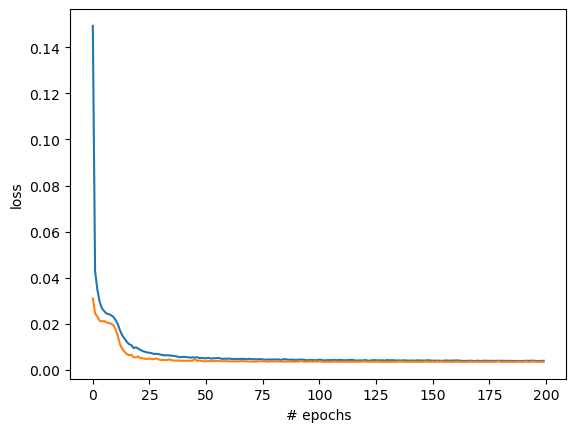

In [36]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [37]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.16295428 0.00234467 0.06916764 0.00586166 0.014068   0.00117233
  0.13130129 0.007034   0.22039859 0.06565064]]
predicted: [[0.47494435 0.05576926 0.46554703 0.12897177 0.6073725  0.14816576
  0.17670536 0.13182126 0.02696898 0.09504017]]


In [38]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[14.   0.3  6.   0.6  1.3  0.2 11.3  0.7 18.9  5.7]]
predicted inverse scaled: [[40.612755   4.8571177 39.81116   11.101292  51.908875  12.73854
  15.172967  11.344354   2.4004543  8.206926 ]]


# Save all the models

In [19]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']

In [18]:
from sklearn.metrics import r2_score

predicted_result=model.predict(test_data)

r2=r2_score(test_target,predicted_result)
print('r2 score:',r2)

42/42 [==============================] - 0s 828us/step
r2 score: 0.8550122389544291
